## Final Project Submission

Please fill out:
* Student name: Joe Webb
* Student pace: part time 
* Scheduled project review date/time: January 28th at 10:15am
* Instructor name: Jeff Hermann
* Blog post URL:


In [ ]:
#Using the OSEMiN Data Science Process, 1 - 2 paragraphs are enclosed that explain my approach to this project 
#through the OSEMN framework.

#1. 'Obtain': The requirement of this project is predict the sale price of housing.  This data will be used to 
#advise investors or banks on how much can be conservatively approve for a home loan.  Safely will be defined as 
#< 2 standard deviations from the equation predictor.  ie 95%

#Data has been gathered on the Selling Price ('Price') of homes between May 2014 and 2015.  19 predictor variables
# are provided in kc_house_data.csv'.  The predictor varables will be analyzed to determine if they should be 
#included in a multivariable regression model to predict the Sale price of a house in the future.  This data will 
#be used to advise investors (or banks) on how much can be conservatively invest in the purchase of a house. Our 
#presentation will include the note that our model is only meant to predict Sale price for houses with less than
# 5 bathrooms, 8 bedrooms, and less than 5900 sq ft.(does not include outliers)

#2. 'Scrub' the data on missing values and outliers.  Decide how to replace or eliminate them

#3. 'Explore':  Create visualizations to really get a feel for your dataset. understanding the distribution of 
#different columns and checking for multicollinearity. Check that the dataset meets the assumptions necessary for 
#a regression task. (normal distribution, linearity, skewness/kurtosis)

#4. 'Model':  develop a model that best predicts a response variable and evaluate.

#5. 'Interpret' the results given by the model 

In [ ]:
#* **id** - unique identified for a house
#* **dateDate** - house was sold
#* **pricePrice** -  is prediction target of Sale Price
#* **bedroomsNumber** -  of Bedrooms/House
#* **bathroomsNumber** -  of bathrooms/bedrooms
#* **sqft_livingsquare** -  footage of the home
#* **sqft_lotsquare** -  footage of the lot
#* **floorsTotal** -  floors (levels) in house
#* **waterfront** - House which has a view to a waterfront
#* **viewed** - Has been viewed
#* **condition** - How good the condition is ( Overall )
#* **grade** - overall grade given to the housing unit, based on King County grading system
#* **sqft_above** - square footage of house apart from basement
#* **sqft_basement** - square footage of the basement
#* **yr_built** - Built Year
#* **yr_renovated** - Year when house was renovated
#* **zipcode** - zip
#* **lat** - Latitude coordinate
#* **long** - Longitude coordinate
#* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
#* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors
#*  Age = 2015 - year built

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [2]:
kc_house=pd.read_csv('kc_house_data.csv')
kc_house['age']=2015-kc_house.yr_built
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


In [3]:
#SCRUB data by becoming familiar with the Dataset
#The first step in our Exploratory Data Analysis will be to get familiar with the data. This step includes:

#Understanding the dimensionality of your dataset
#Investigating what type of data it contains, and the data types used to store it
#Discovering how missing values are encoded, and how many there are.
#Getting a feel for what information it does and doesnt contain
#In the cell below, get the descriptive statistics of each DataFrame.
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,44.000324
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


In [4]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


In [5]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
age              21597 non-null int64
dtypes: float64(8), int64(12), object

In [4]:
#All predictors have 21597 values except 'waterfront','view', and 'yr_renovated'.  Next step is to evaluate the 
#values in these 3 predictors

In [6]:
print(kc_house.view.value_counts().head())
print(kc_house.waterfront.value_counts().head())
kc_house.yr_renovated.value_counts().head()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    19075
1.0      146
Name: waterfront, dtype: int64


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [7]:
kc_house.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [8]:
kc_house.waterfront.unique()

array([nan,  0.,  1.])

In [9]:
kc_house.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [ ]:
#View has 19422 values of "0".  It cannot be determined if this is 'no' or if this is a placeholder, but we will
#keep 'view' for now.

#Waterfront data will be kept because the value indicates if it is waterfront or not.  

#I mistakenly dropped 'yr_renovated' is my first model because .value_counts showed only 1% of values.  After
#looking at the model exhaustively, I looked at the .unique() values and was surprised.  So, I'll reevaluate 
#yr_renovated.

In [10]:
kc_house2=kc_house

In [7]:
#'date' and 'sqft_basement' are objects, so need to convert.

In [11]:
kc_house2['date']=pd.to_datetime(kc_house2['date'])
kc_house2['sqft_basement']=kc_house2['sqft_basement'].convert_objects(convert_numeric=True)#It was very important
#to convert 'sqft_basement' to a float, because the null values didn't appear when they were 'objects'

kc_house2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
age              21597 non-null int64
dtypes: datetime64[ns](1), f

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [12]:
kc_house2.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


In [ ]:
#Categorical Predictors:  floors (1 to 3.5), waterfront (0 or 1), condition (1 to 5), view (0 to 4), grade (3 to 
#7), bedrooms (1 to 33), zipcode (98001 to 98199), yr_built (1900 to 2015).  I researched if any of the 
#categories needed dummy variables.  All of the categories have their inherent'category codes', except waterfront.
#Waterfront has 2 categoris.  So, I chose not to assign category dummy variables.

#Continuous predictors:  id, Price, sqft_living, sqft_lot, lat, long, sqft_living15, sqft_lot15

In [13]:
kc_house2.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
age                 0
dtype: int64

In [ ]:
#Waterfront has 2376 (11%), view has 63 (.2%), sqft_basement has 454 (2%) null values.  Let's investigate the 
#null values.

In [14]:
kc_house2.waterfront.unique(), kc_house2.view.unique()

(array([nan,  0.,  1.]), array([ 0., nan,  3.,  4.,  2.,  1.]))

In [15]:
kc_house2.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [16]:
#An outlier was discovered in the EXPLORATION phase of the project, so I came back and and dropping that row.
kc_house2 = kc_house2.drop([15856], axis=0)#dropped outlier with 33 bedrooms & only 1.75 bathrooms.

In [17]:
#Separating the data into 3 different dataframes based on the 'waterfront' value
kc_water_zero=kc_house2[kc_house2['waterfront']==0]

kc_water_one=kc_house2[kc_house2['waterfront']==1]

kc_water_nan=kc_house2[kc_house2['waterfront']!=0]
kc_water_nan2=kc_water_nan[kc_water_nan['waterfront']!=1]
kc_water_zero.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,1.907400e+04,1.907400e+04,19074.000000,19074.000000,19074.000000,1.907400e+04,19074.000000,19074.0,19018.000000,19074.000000,...,19074.000000,18661.000000,19074.000000,15687.000000,19074.000000,19074.000000,19074.000000,19074.000000,19074.000000,19074.000000
mean,4.593467e+09,5.326364e+05,3.373283,2.112562,2073.548181,1.499159e+04,1.494023,0.0,0.203965,3.408881,...,1785.914229,287.658539,1971.108105,79.285141,98077.589808,47.560072,-122.213546,1982.087134,12729.907151,43.891895
std,2.877221e+09,3.449673e+05,0.902010,0.764553,909.101646,4.077801e+04,0.539982,0.0,0.698402,0.649346,...,824.969858,436.999915,29.392182,389.893315,53.374809,0.138858,0.140741,680.983975,27594.215147,29.392182
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.036250e+03,1.000000,0.0,0.000000,3.000000,...,1190.000000,0.000000,1952.000000,0.000000,98032.000000,47.471200,-122.328000,1490.000000,5100.000000,18.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7600.000000,40.000000
75%,7.334401e+09,6.385000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,...,2210.000000,550.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10031.750000,63.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,...,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


In [19]:
kc_water_one.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,...,146.000000,142.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,3.541096,...,2508.760274,748.978873,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630,52.719178
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,0.743957,...,1283.720489,809.891968,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993,27.118576
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,1.000000,...,440.000000,0.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000,1.000000
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,...,1565.000000,0.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000,30.250000
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,...,2200.000000,580.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000,55.500000
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,...,3220.000000,1270.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000,73.750000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,...,7680.000000,4820.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000,110.000000


In [20]:
kc_water_nan2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,2.376000e+03,2.376000e+03,2376.000000,2376.000000,2376.000000,2.376000e+03,2376.000000,0.0,2370.000000,2376.000000,...,2376.000000,2339.000000,2376.000000,1946.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,4.484801e+09,5.294301e+05,3.361532,2.105745,2063.341330,1.530689e+04,1.486532,NaN,0.256540,3.408670,...,1766.194865,297.430526,1970.675084,94.323227,98079.694865,47.561465,-122.213497,1980.507576,12366.675084,44.324916
std,2.873451e+09,3.250794e+05,0.908079,0.764266,881.380488,4.595495e+04,0.535898,NaN,0.783974,0.652826,...,794.747951,440.459181,29.302970,423.549734,53.949839,0.137431,0.140720,689.428551,24694.192000,29.302970
min,1.000102e+06,8.000000e+04,1.000000,0.750000,430.000000,6.000000e+02,1.000000,NaN,0.000000,1.000000,...,430.000000,0.000000,1900.000000,0.000000,98001.000000,47.180800,-122.503000,780.000000,788.000000,0.000000
25%,2.112250e+09,3.228750e+05,3.000000,1.500000,1430.000000,5.031750e+03,1.000000,NaN,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.750000,47.472925,-122.327000,1470.000000,5108.000000,19.000000
50%,3.789200e+09,4.450000e+05,3.000000,2.250000,1900.000000,7.607000e+03,1.500000,NaN,0.000000,3.000000,...,1550.000000,0.000000,1973.000000,0.000000,98070.000000,47.571400,-122.228000,1820.000000,7624.500000,42.000000
75%,7.227501e+09,6.496125e+05,4.000000,2.500000,2520.000000,1.052475e+04,2.000000,NaN,0.000000,4.000000,...,2190.000000,600.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125750,2370.000000,10001.250000,64.000000
max,9.839301e+09,3.200000e+06,8.000000,6.500000,7730.000000,1.074218e+06,3.500000,NaN,4.000000,5.000000,...,6660.000000,2160.000000,2015.000000,2015.000000,98199.000000,47.777400,-121.319000,4940.000000,311610.000000,115.000000


In [15]:
#WATERFRONT NAN VALUES:  The dataframe was split into 3 subset based on the 'waterfront' value.  The 5-point 
#statistics of the 'nan'subset is extremely similar to the '0' subset.  Each statistic (except max) is within 
#1.7%.  Whereas, 5-point stastic values in the 'waterfront 1' subset are atleast 2.6 times larger than the 'nan' 
#subset.

#Intuitively, this makes sense.  If a property is on the waterfront, then it would be positively recorded as such 
# with a '1' value.  However, a property not on the waterfront would be assigned a '0' or not assigned a value.
#This is confirmed by the similarity of the "0" waterfront subset to the 'nan' subset.

#Therefore, my model will re-assign 'nan' values with '0' in the waterfront column.

In [ ]:
#SQFT_BASEMENT NAN VALUES.  The choice is to drop 2% of the sqft_basement values that are nan.  Or replace those 
#value with the mean (297.4) or median (0).  For now, I'm going to fillna with the median ('0')

#YR_RENOVATED NAN VALUES.  The choice is to drop 3843 (18%) of the yr_renovated values that are nan.  Or replace 
#those value with the mean (83 or median (0).  For now, I'm going to fillna with the median ('0')

#VIEW NAN VALUES:  For now, I'm going to fillna with the median ('0'), instead of the mean (.23).  90% of the 
#view values are '0'.  

In [22]:
kc_house2.waterfront.fillna(0, inplace=True)
kc_house2.sqft_basement.fillna(0, inplace=True)
kc_house2.view.fillna(0, inplace=True)
kc_house2.yr_renovated.fillna(0, inplace=True)
kc_house2.waterfront.unique()

array([0., 1.])

In [23]:
kc_house2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

In [24]:
kc_house2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
age              0
dtype: int64

In [ ]:
#3. EXPLORE:  Create visualizations to really get a feel for your dataset. +Check for outliers.  Understand the 
#distribution of different columns and checking for multicollinearity. Check that the dataset meets the 
#assumptions necessary for a regression task. (normal distribution, linearity, skewness/kurtosis)

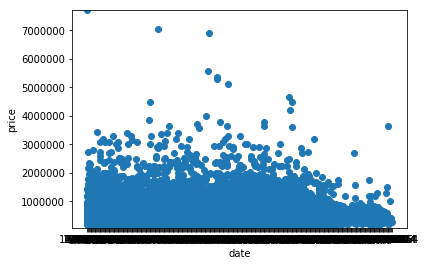

In [15]:
plt.plot_date(x=kc_house['date'],y=kc_house['price'])
plt.xlabel('date')
plt.ylabel('price')
plt.ylim(78000,7700000)
plt.show()

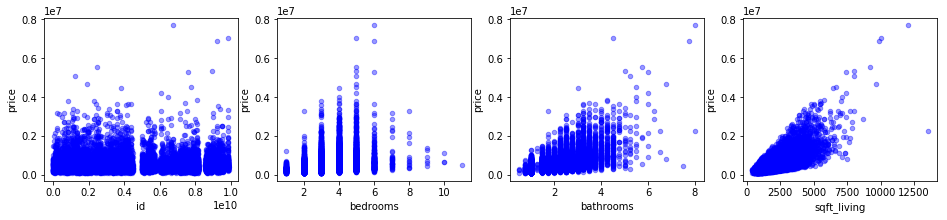

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip([ 'id', 'bedrooms','bathrooms','sqft_living'], axes):
    kc_house2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

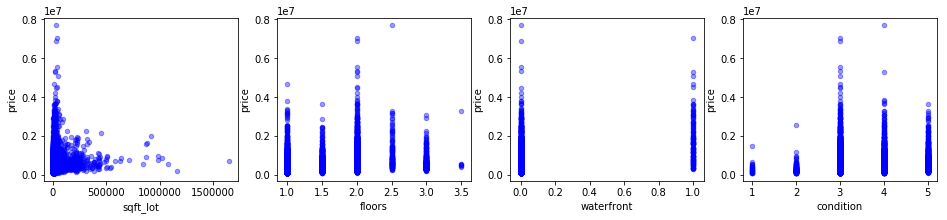

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip([ 'sqft_lot', 'floors','waterfront','condition'], axes):
    kc_house2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

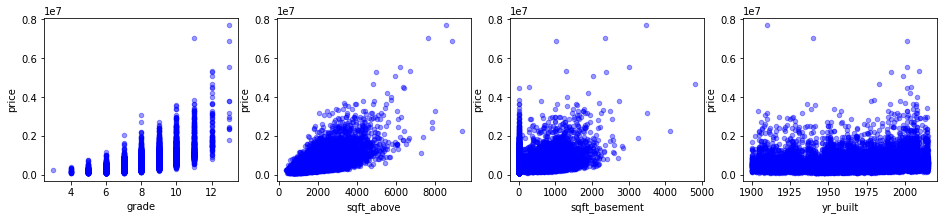

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip([ 'grade', 'sqft_above','sqft_basement','yr_built'], axes):
    kc_house2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

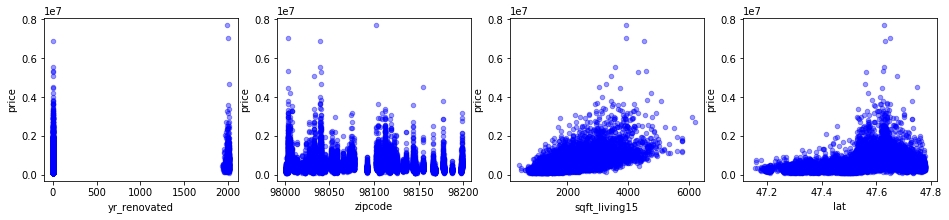

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_renovated','zipcode','sqft_living15','lat'], axes):
    kc_house2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

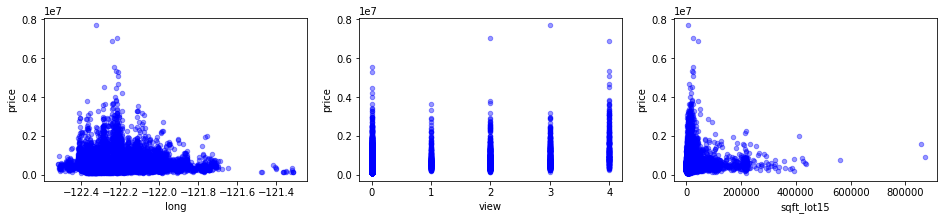

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['long','view','sqft_lot15'], axes):
    kc_house2.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [18]:
kc_house2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')

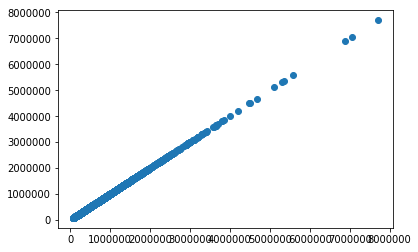

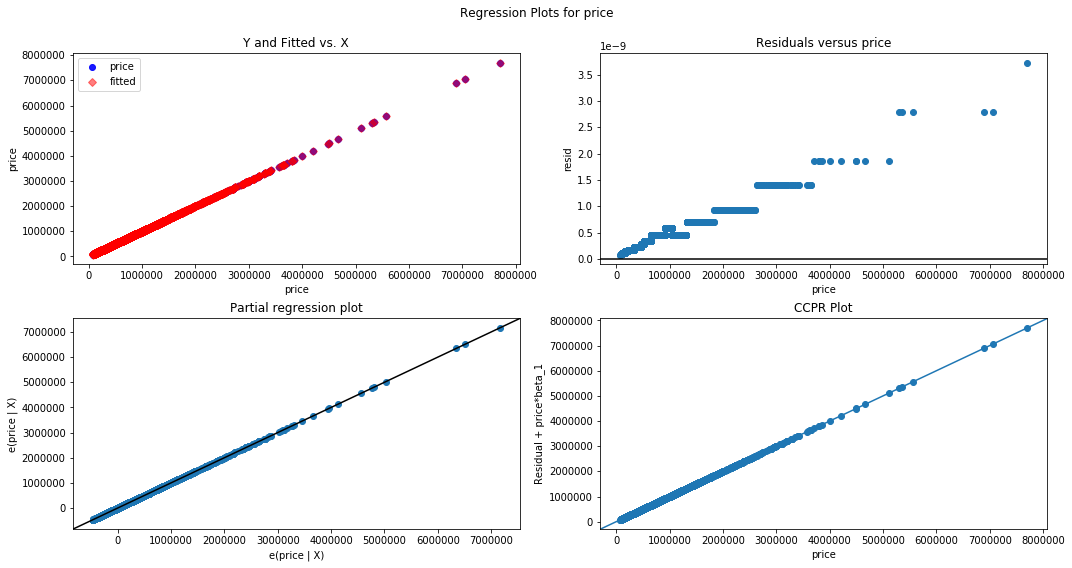

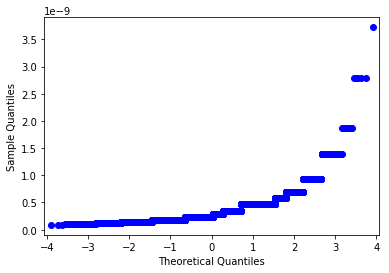

Press Enter to continue...


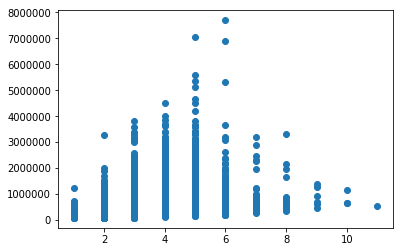

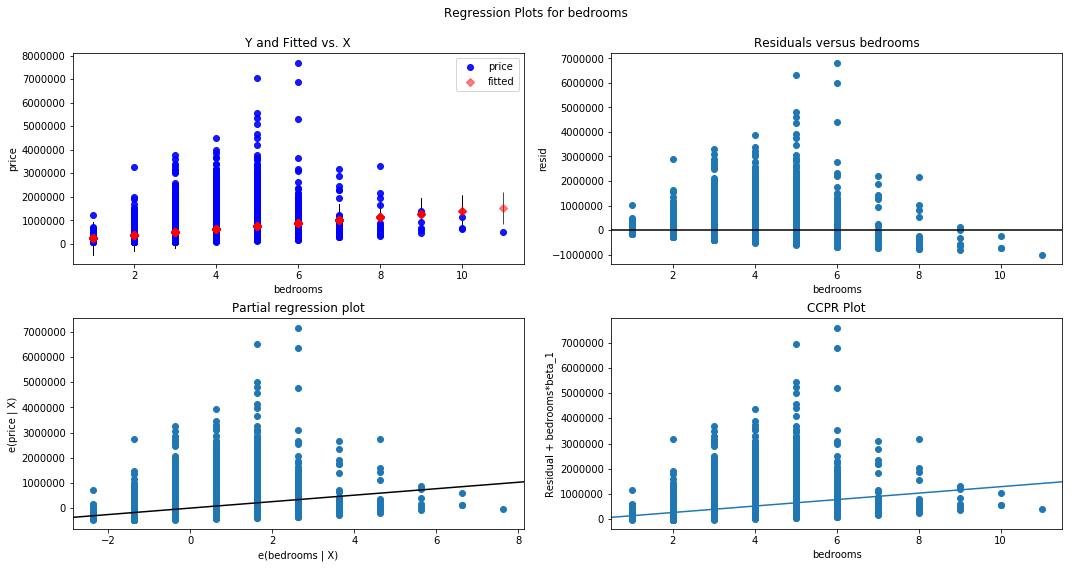

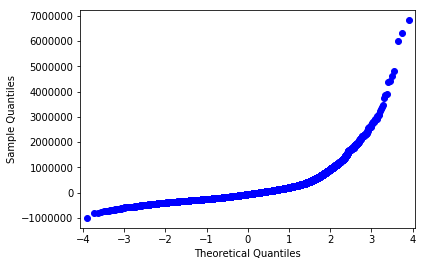

Press Enter to continue...


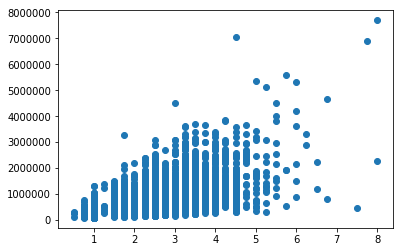

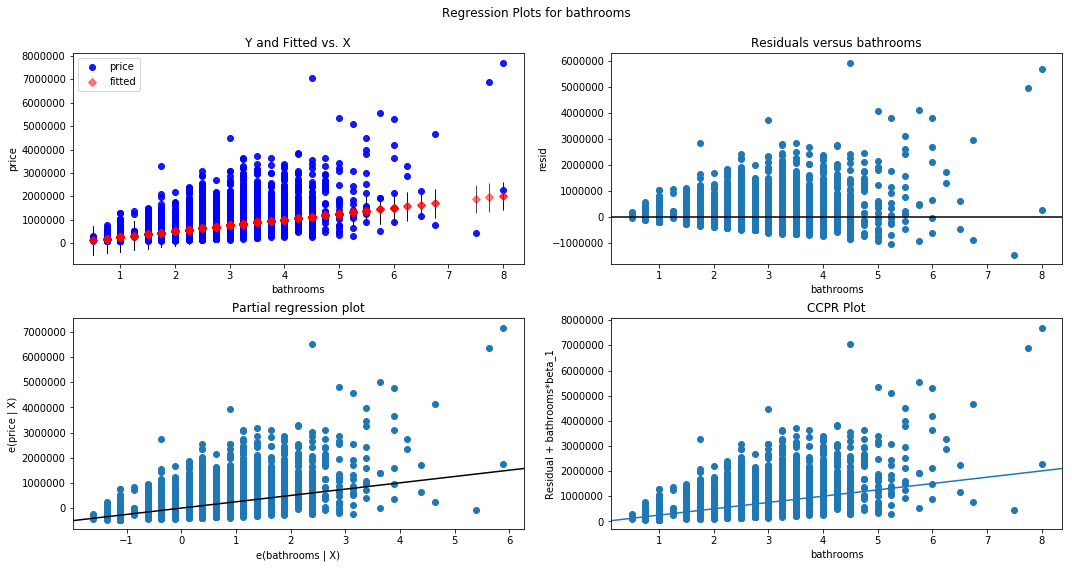

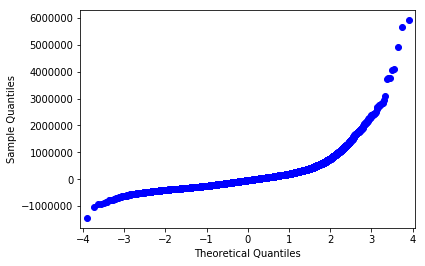

Press Enter to continue...


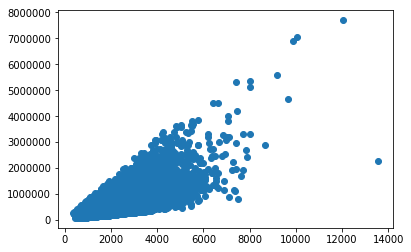

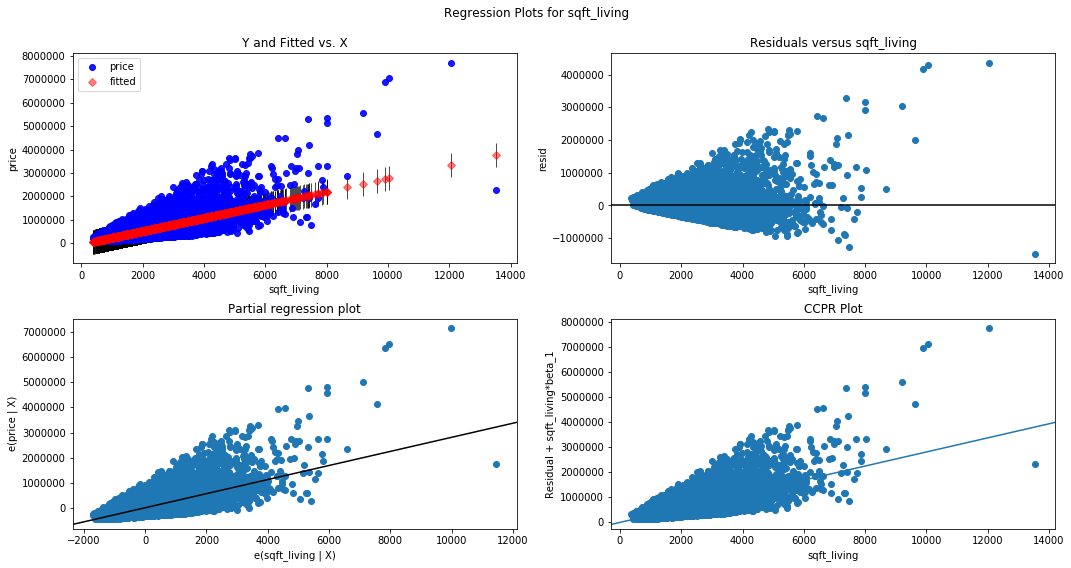

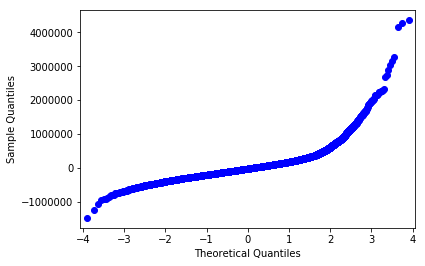

Press Enter to continue...


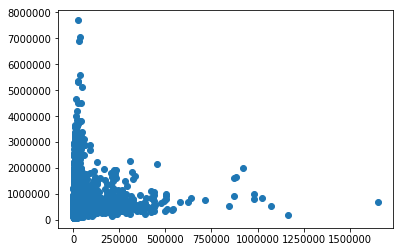

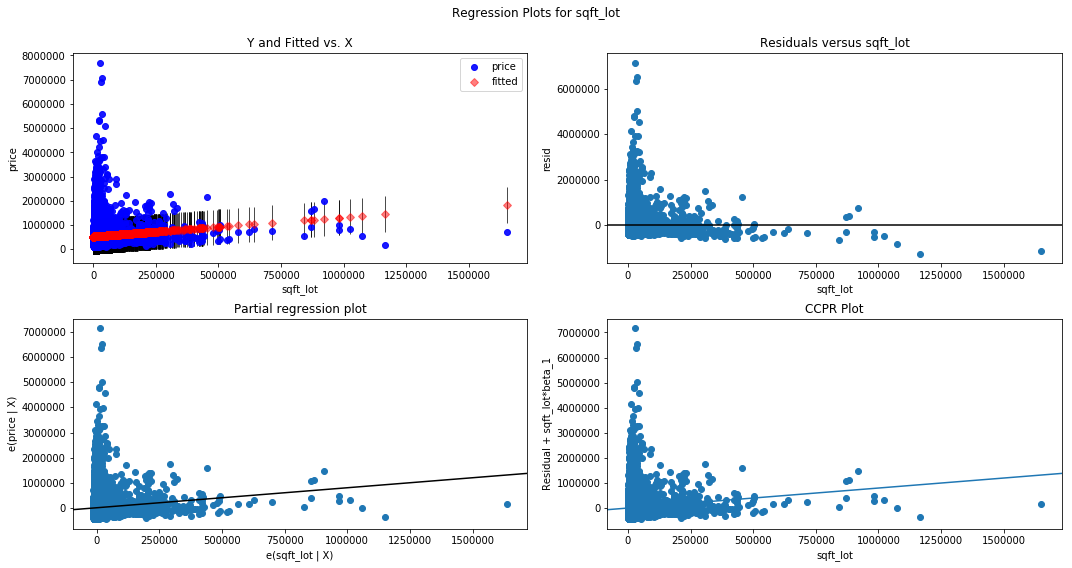

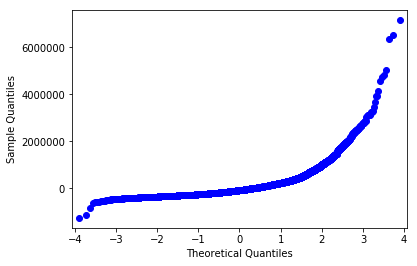

Press Enter to continue...


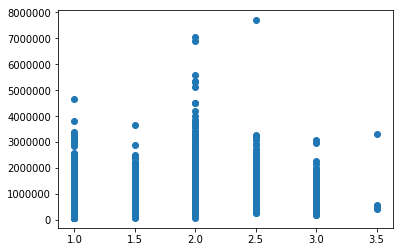

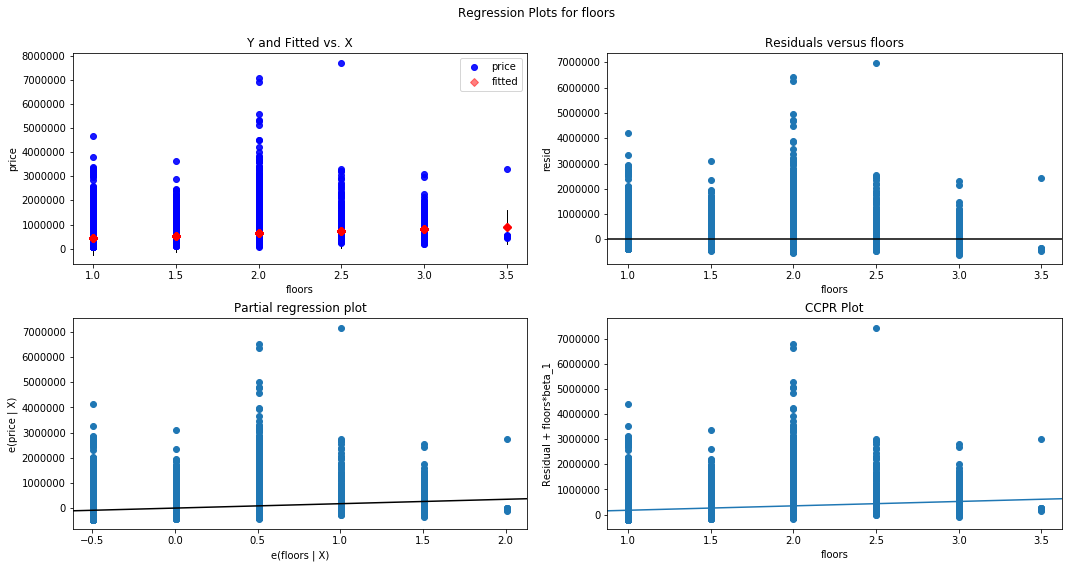

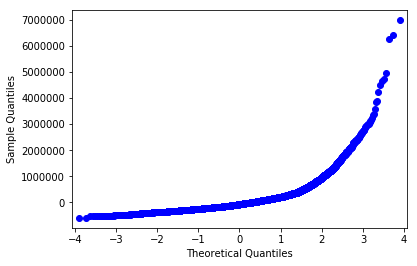

Press Enter to continue...


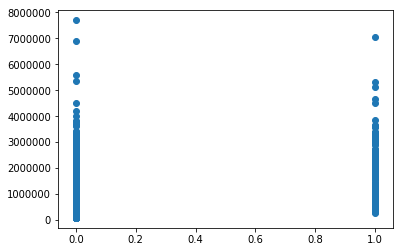

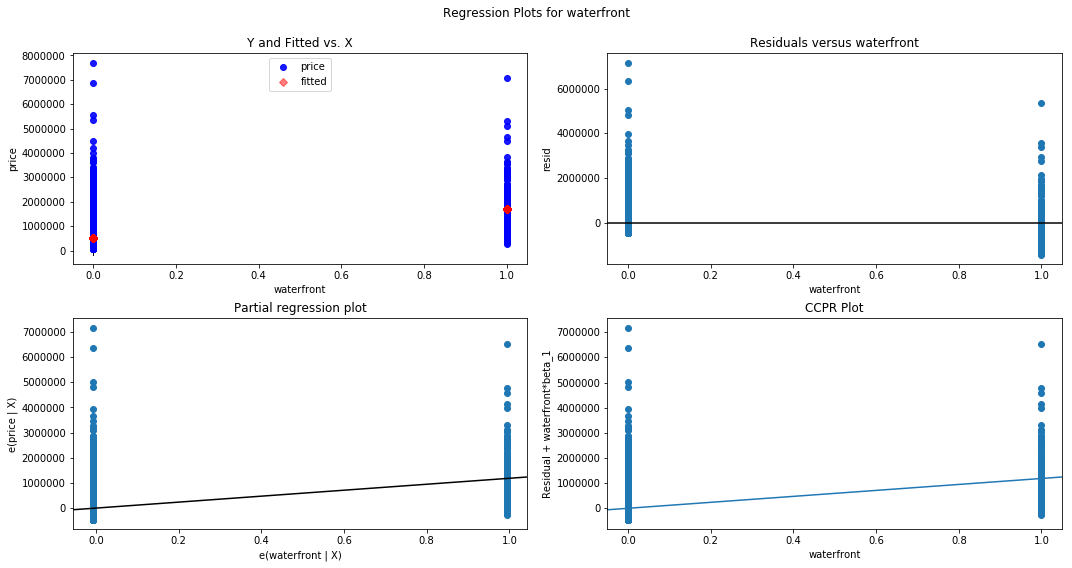

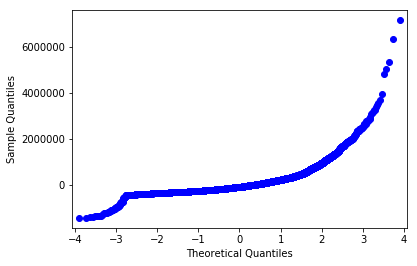

Press Enter to continue...


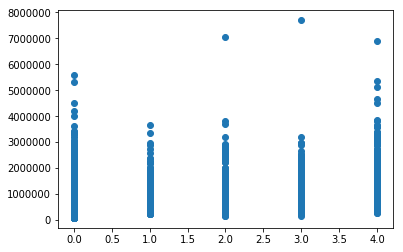

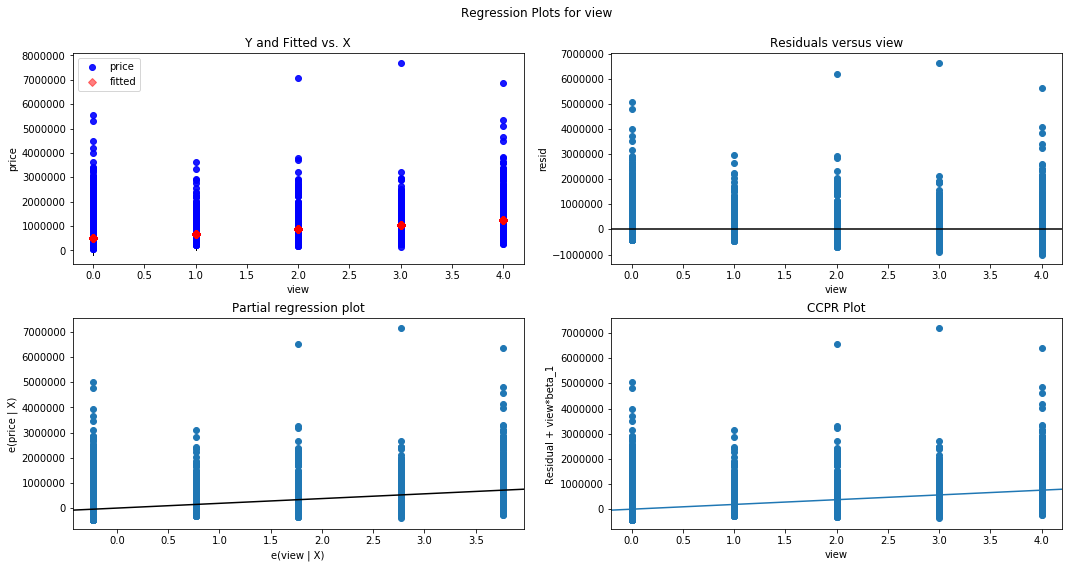

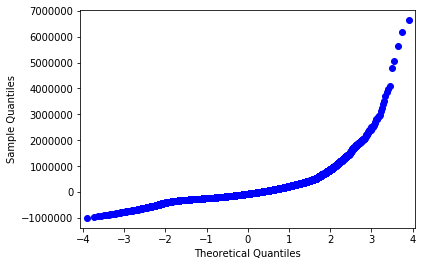

Press Enter to continue...


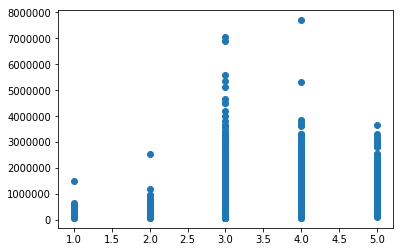

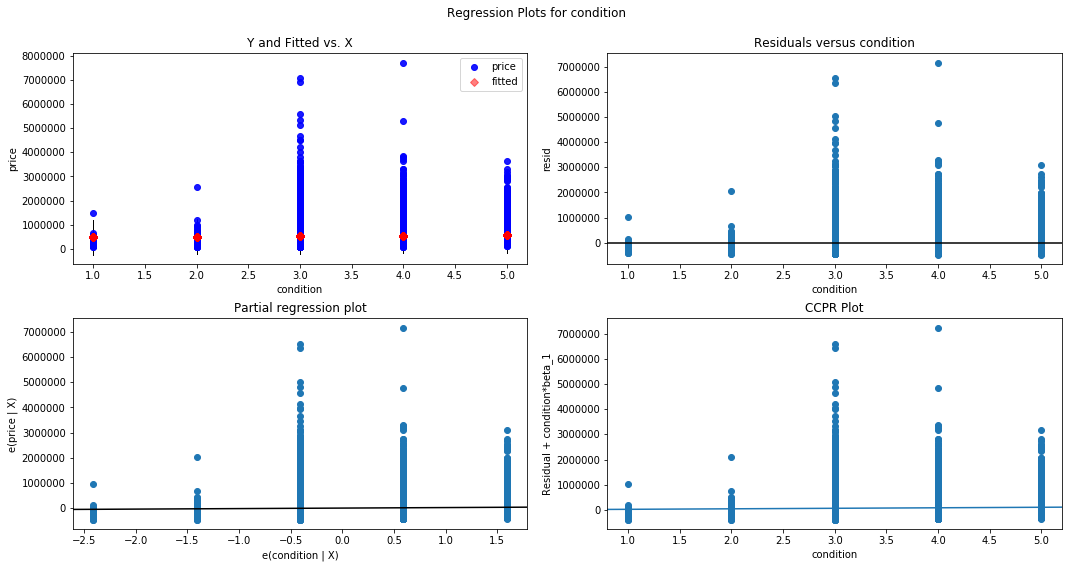

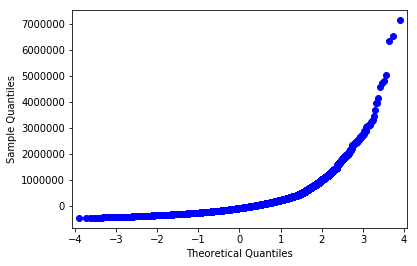

Press Enter to continue...


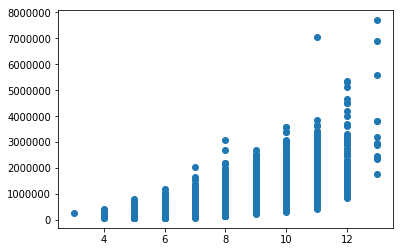

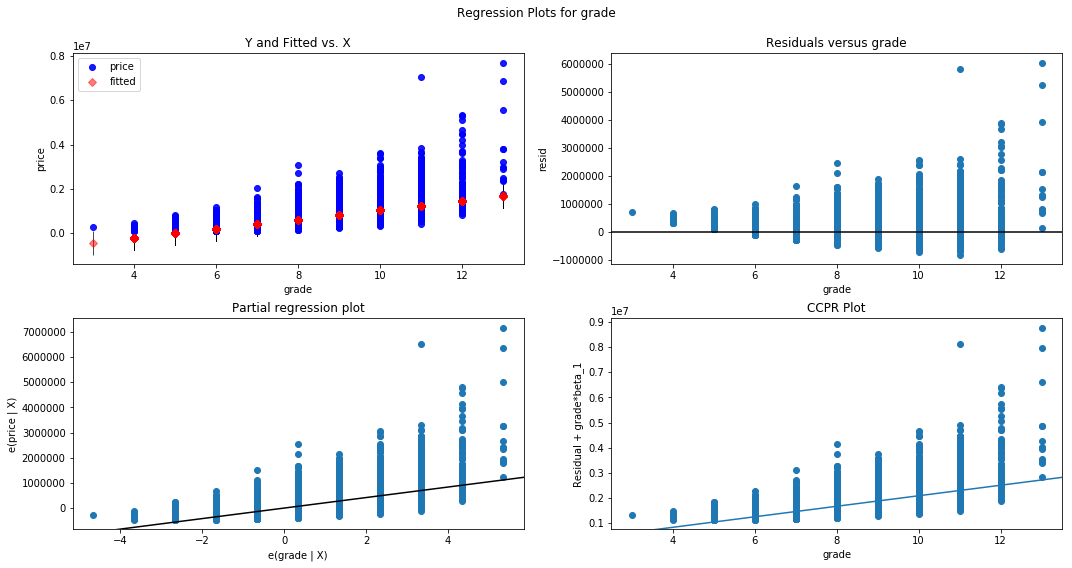

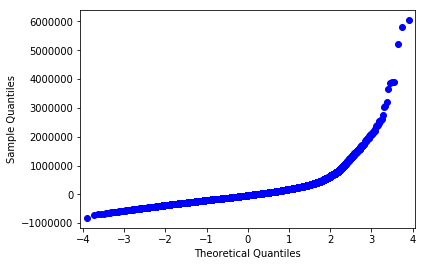

Press Enter to continue...


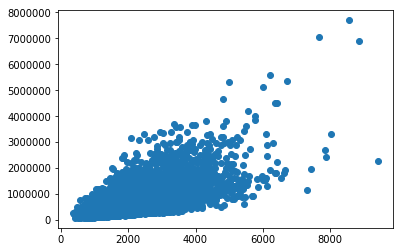

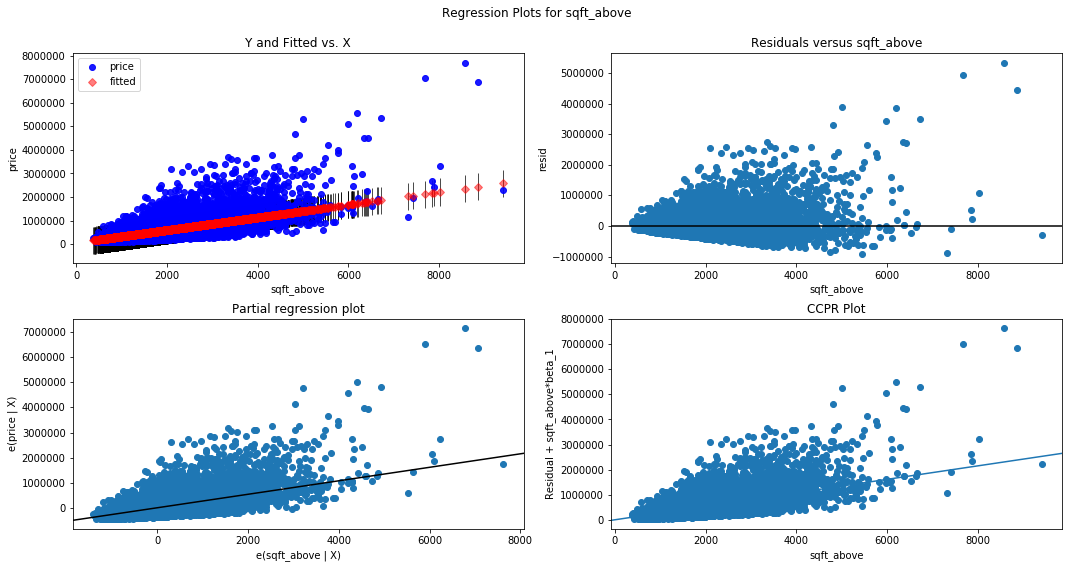

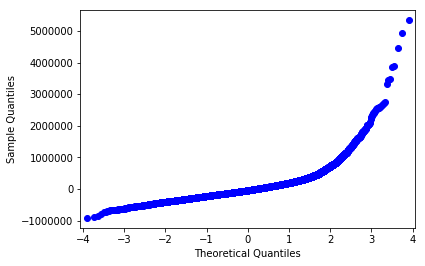

Press Enter to continue...


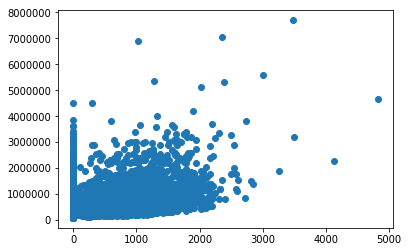

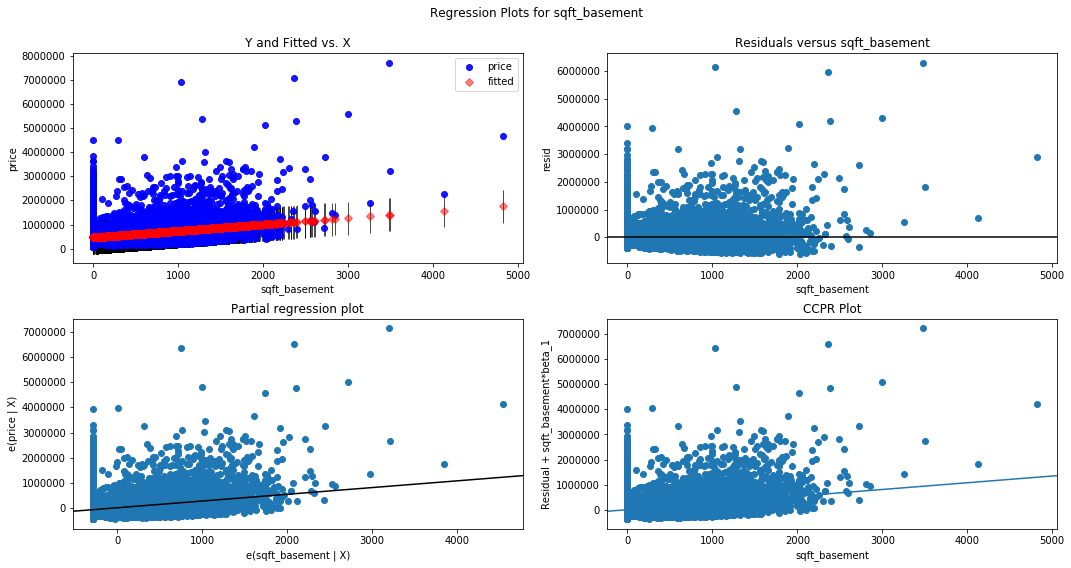

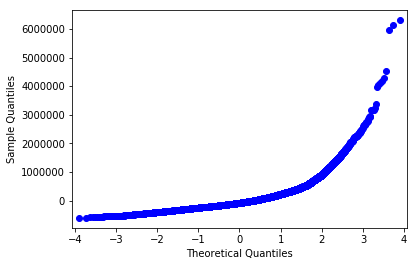

Press Enter to continue...


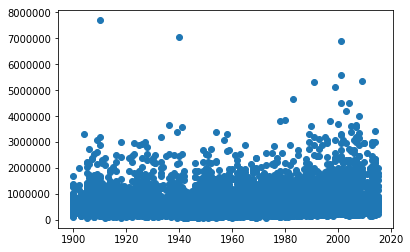

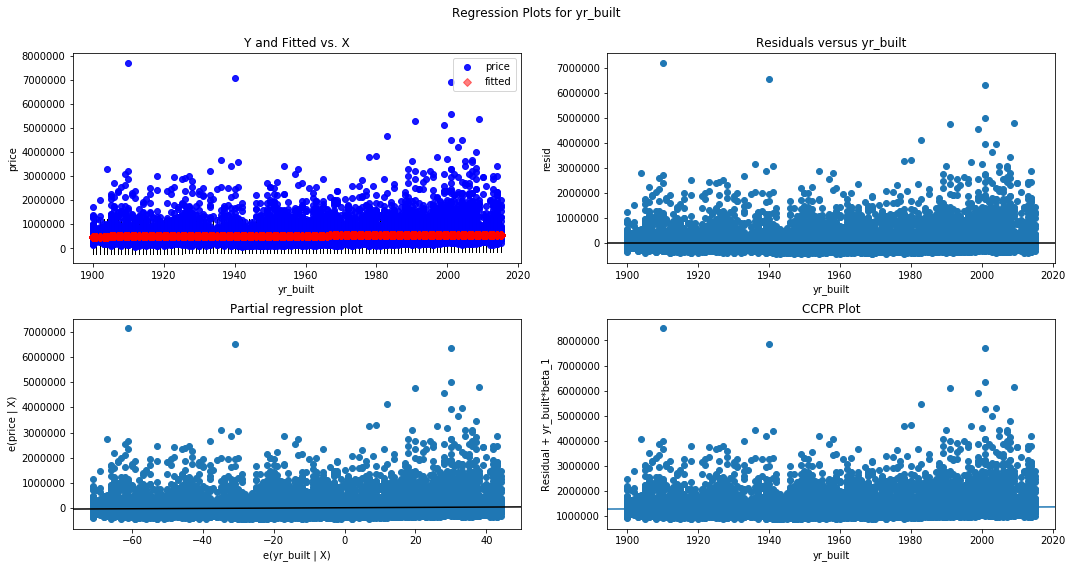

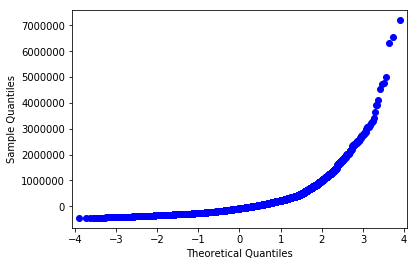

Press Enter to continue...


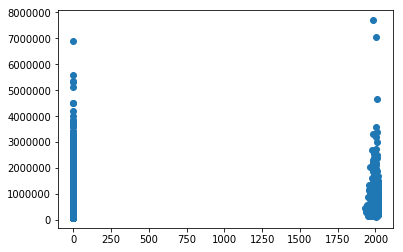

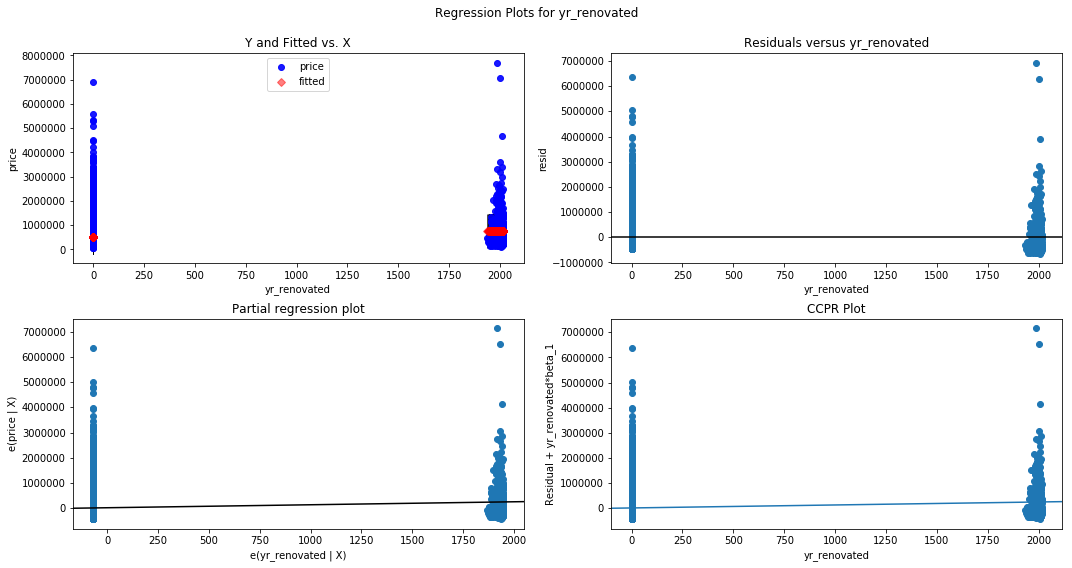

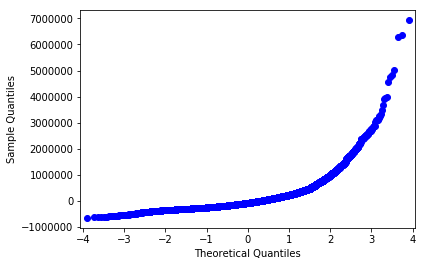

Press Enter to continue...


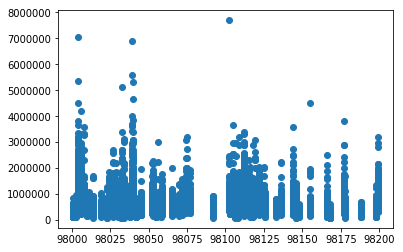

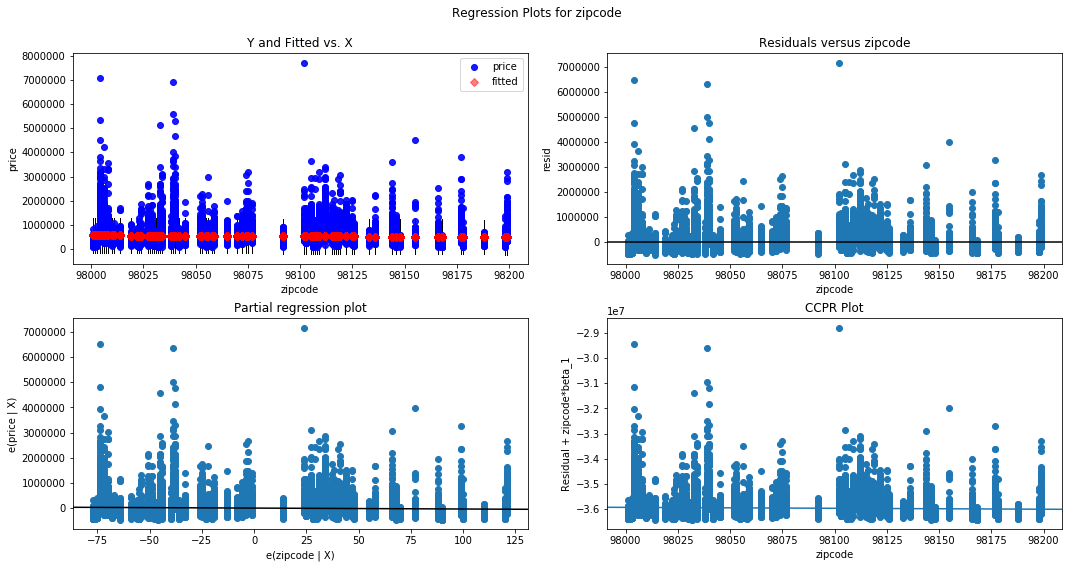

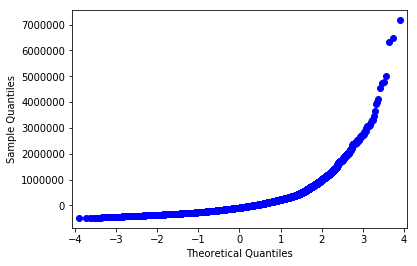

Press Enter to continue...


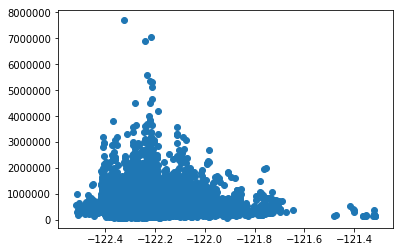

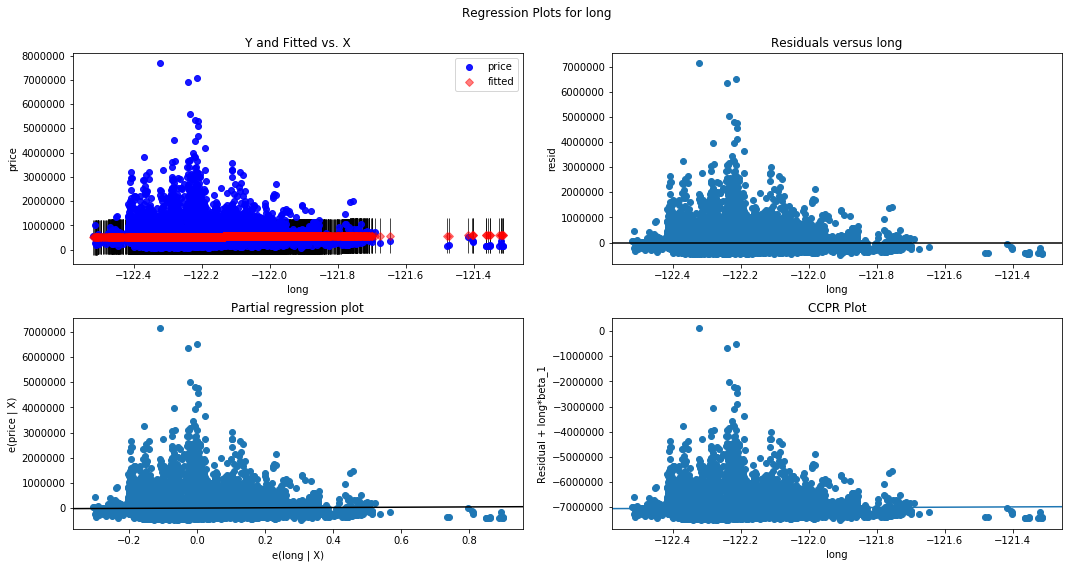

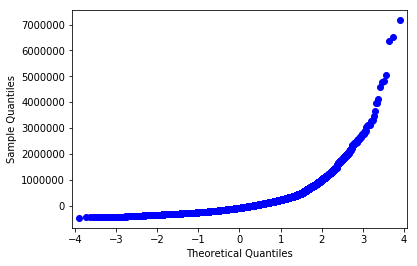

Press Enter to continue...


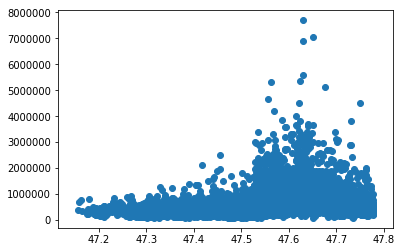

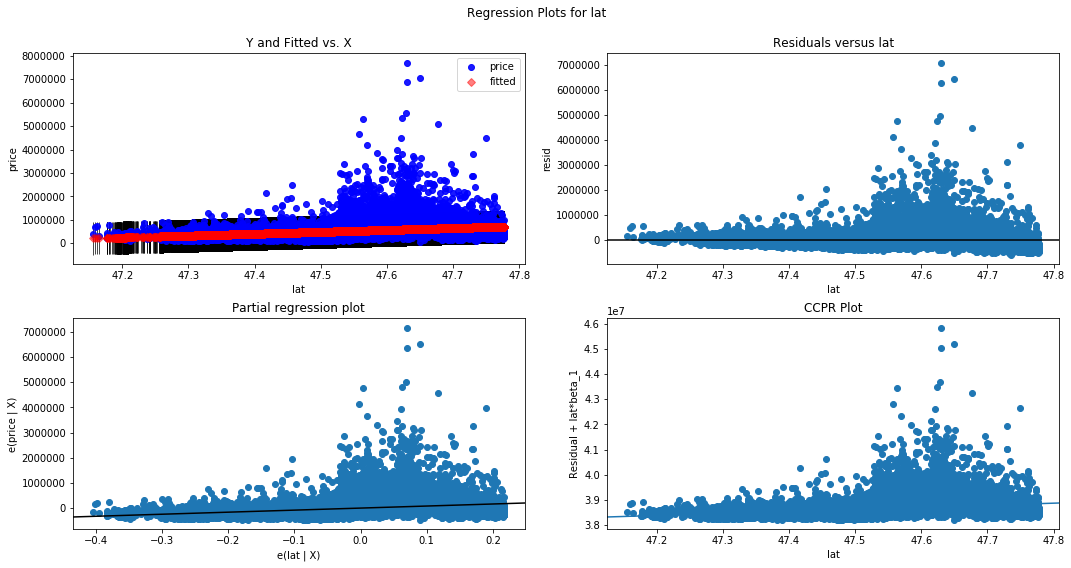

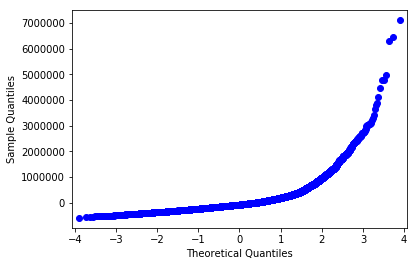

Press Enter to continue...


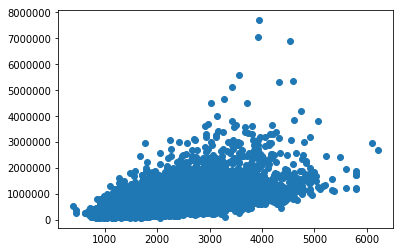

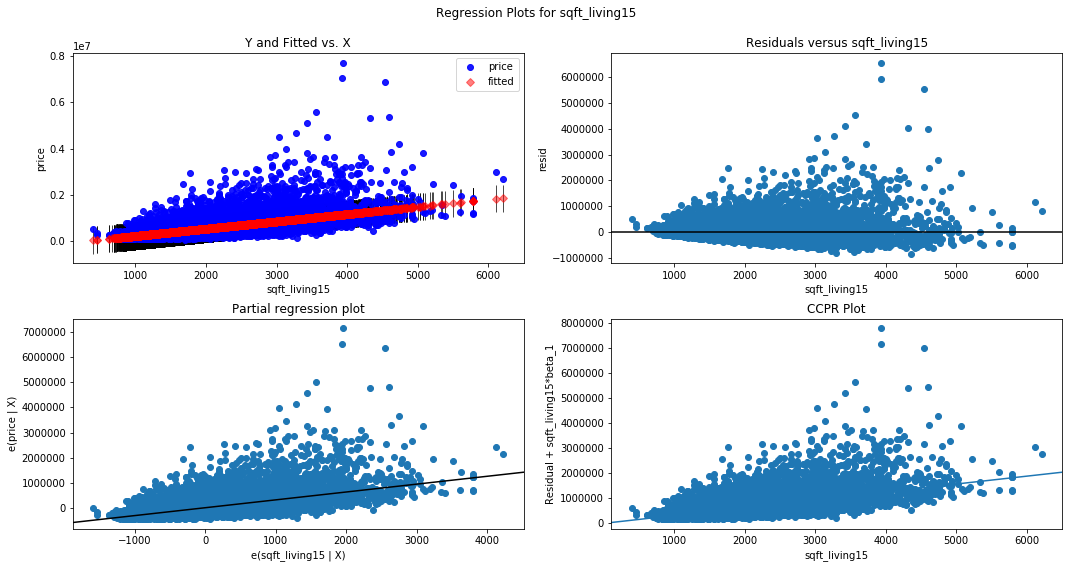

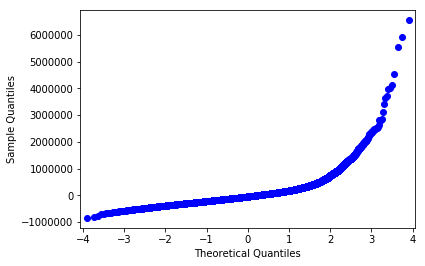

Press Enter to continue...


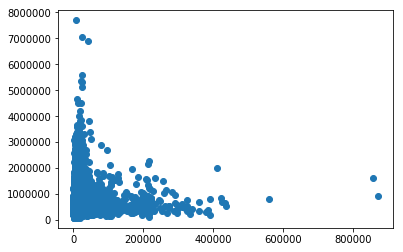

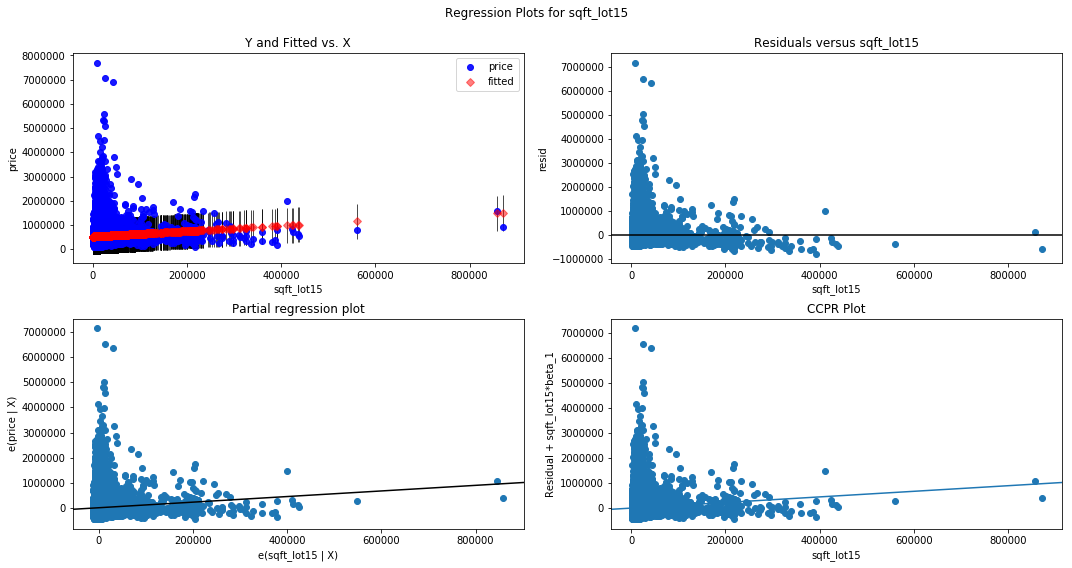

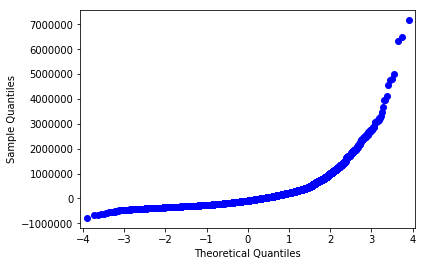

Press Enter to continue...


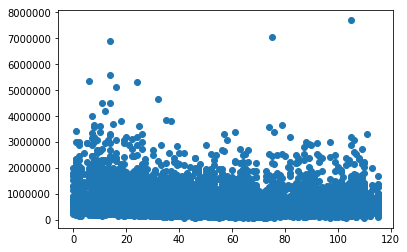

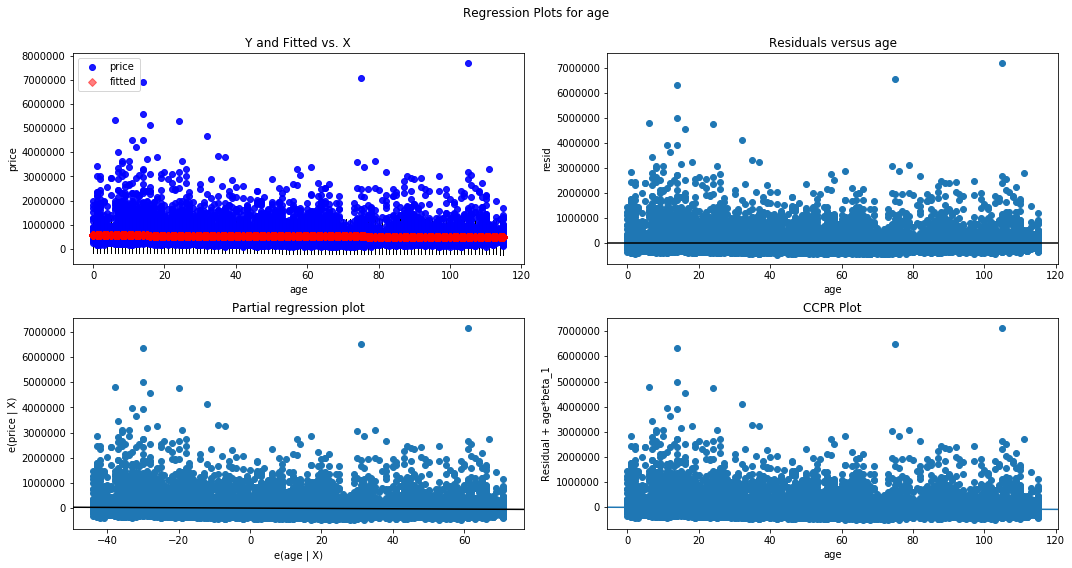

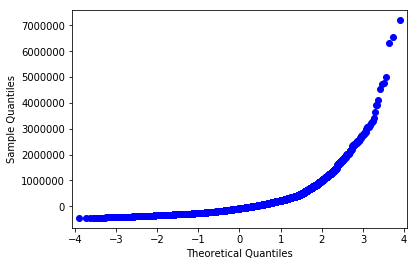

Press Enter to continue...


In [28]:
import statsmodels.stats.api as sms
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
results=[['Ind-Var','r-squared','slope','p-value','normality(JB)']]

for idx, val in enumerate(['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'zipcode','long','lat',
       'sqft_living15', 'sqft_lot15','age']):
    f='price~'+val
    model=ols(formula=f,data=kc_house2).fit()
    X_new=pd.DataFrame({val:[kc_house2[val].min(),kc_house2[val].max()]});
    Y_pred=model.predict(X_new)
    plt.scatter(kc_house2[val],kc_house2.price)
                

    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model,val,fig=fig)
    fig = sm.graphics.qqplot(model.resid)
    plt.show()

    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], 
                    sms.jarque_bera(model.resid)[1]])
    input("Press Enter to continue...")    


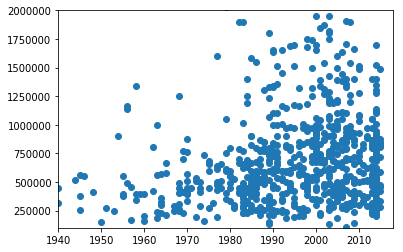

In [53]:
plt.scatter(x=kc_house2.yr_renovated, y=kc_house2.price) 
plt.xlim(1940,2018)
plt.ylim(100000,2000000)
plt.show()

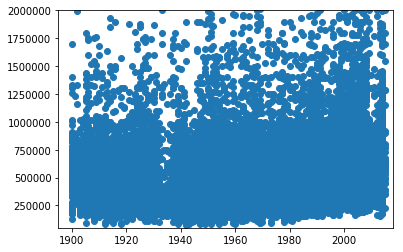

In [45]:
plt.scatter(x=kc_house2.yr_built, y=kc_house2.price) 
plt.xlim(1895,2018)
plt.ylim(50000,2000000)
plt.show()

In [54]:
#The visualizations show that there is no relationship between price and 'condition', 'yr_built', 'zipcode', 
#'long', and 'age'.  These columns will be dropped.

kc_house3=kc_house2.drop(['id','condition','yr_built','zipcode','long','age'],axis=1)

In [55]:
kc_house3.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#there are outliers, so I'm going to use boxplots to detect them.

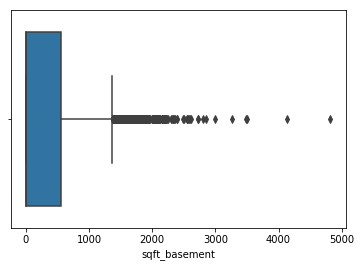

In [19]:
import seaborn as sns
#sns.boxplot(x=kc_house2['bedrooms'])
#sns.boxplot(x=kc_house2['sqft_living'])
#sns.boxplot(x=kc_house2['sqft_lot'])
#sns.boxplot(x=kc_house2['sqft_above'])
sns.boxplot(x=kc_house2['sqft_basement'])
#sns.boxplot(x=kc_house2['long'])
#sns.boxplot(x=kc_house2['sqft_living15'])
#sns.boxplot(x=kc_house2['sqft_lot15'])

In [56]:
kc_house3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,7.657946,1788.631506,285.702954,68.761391,47.560087,1986.650722,12758.656649
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,1.173218,827.763251,439.825454,364.045627,0.138552,685.231768,27275.018316
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,3.000000,370.000000,0.000000,0.000000,47.155900,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,0.000000,47.471100,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,0.000000,47.571800,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,550.000000,0.000000,47.678000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,6210.000000,871200.000000


In [21]:
#the boxplot visualizes if there are outliers outside the range of the 'whisker' line.  After viewing the boxplot,
#I'll check the variance of data by viewing the number of points > than a chosen value picked off of the boxplot.

#Initially, I did not drop outliers.  But after completing an initial model, I decided to circle back and remove
#outliers to improve the effectiveness (Rsquared) of the model.

#I've chosen to remove outliers for'bathrooms','bedrooms','sqft_living' (but not 'grade) using IQR=3.  My 
#presentation will include the note that our model is only meant to predict Sale price for houses with less than
# 5 bathrooms, 8 bedrooms, and less than 5900 sq ft.

#kc_house2[kc_house2['grade']>11]  #102 rows
#kc_house2[kc_house2['bathrooms']>4.75]  #64 rows
#kc_house2[kc_house2['bedrooms']>7]#  23 rows
#kc_house2[kc_house2['sqft_living']>5910]#  74 rows

kc_house3=kc_house2[(kc_house2['bathrooms']<5) & (kc_house2['bedrooms']<8) &  (kc_house2['sqft_living']<5900)]   
kc_house2.shape,kc_house3.shape


((21596, 21), (21472, 21))

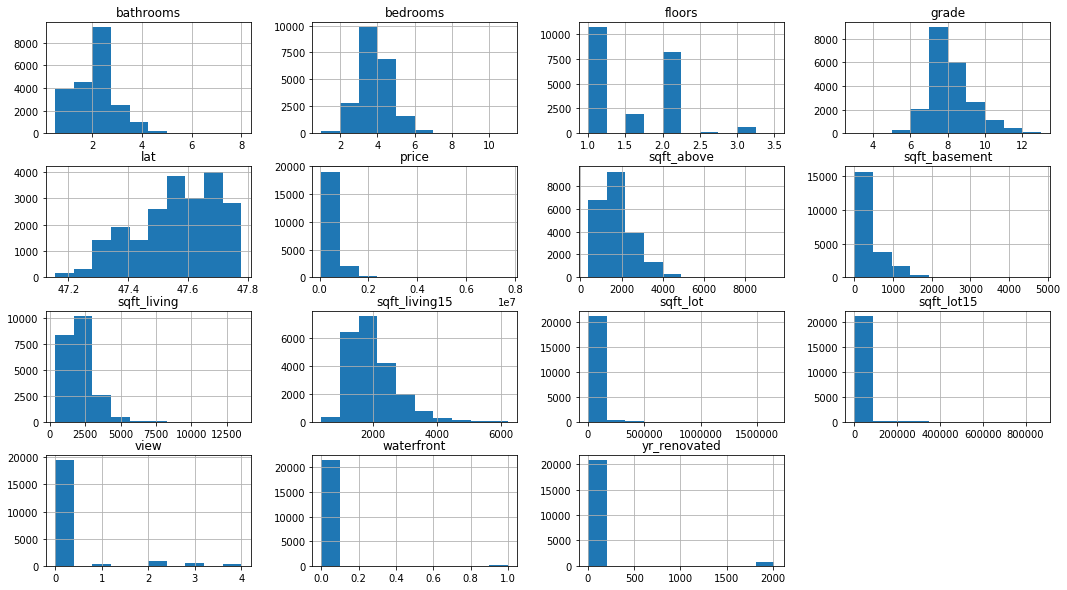

In [57]:
kc_house3.hist(figsize=(18,10) );

In [58]:
kc_house3.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

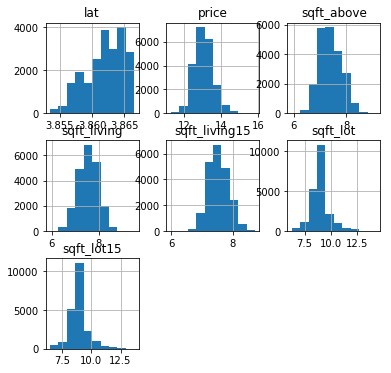

In [59]:
#Logtransform the continuous variables to improve skewness.  Transformations are conducted on continuous variables
#not categorical.  Cannot log transform 'sqft_basement' because  it has a majority of zero values
kc_house3_log= pd.DataFrame([])
kc_house3_log['price']=np.log(kc_house3['price'])
kc_house3_log['sqft_living']=np.log(kc_house3['sqft_living'])
kc_house3_log['sqft_lot']=np.log(kc_house3['sqft_lot'])
kc_house3_log['sqft_above']=np.log(kc_house3['sqft_above'])
kc_house3_log['lat']=np.log(kc_house3['lat'])
kc_house3_log['sqft_living15']=np.log(kc_house3['sqft_living15'])
kc_house3_log['sqft_lot15']=np.log(kc_house3['sqft_lot15'])
kc_house3_log.hist(figsize  = [6, 6]);

In [60]:
#dropping 'date','lat' because not normal distribution and no linearity
#keeping 'sqft_lot' and 'sqft_lot15' until I confirm no linearity with a correlation test.
kc_house4=kc_house3.drop(['date','lat'],axis=1)
kc_house4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,7,1180,0.0,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,400.0,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,6,770,0.0,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,910.0,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,0.0,0.0,1800,7503


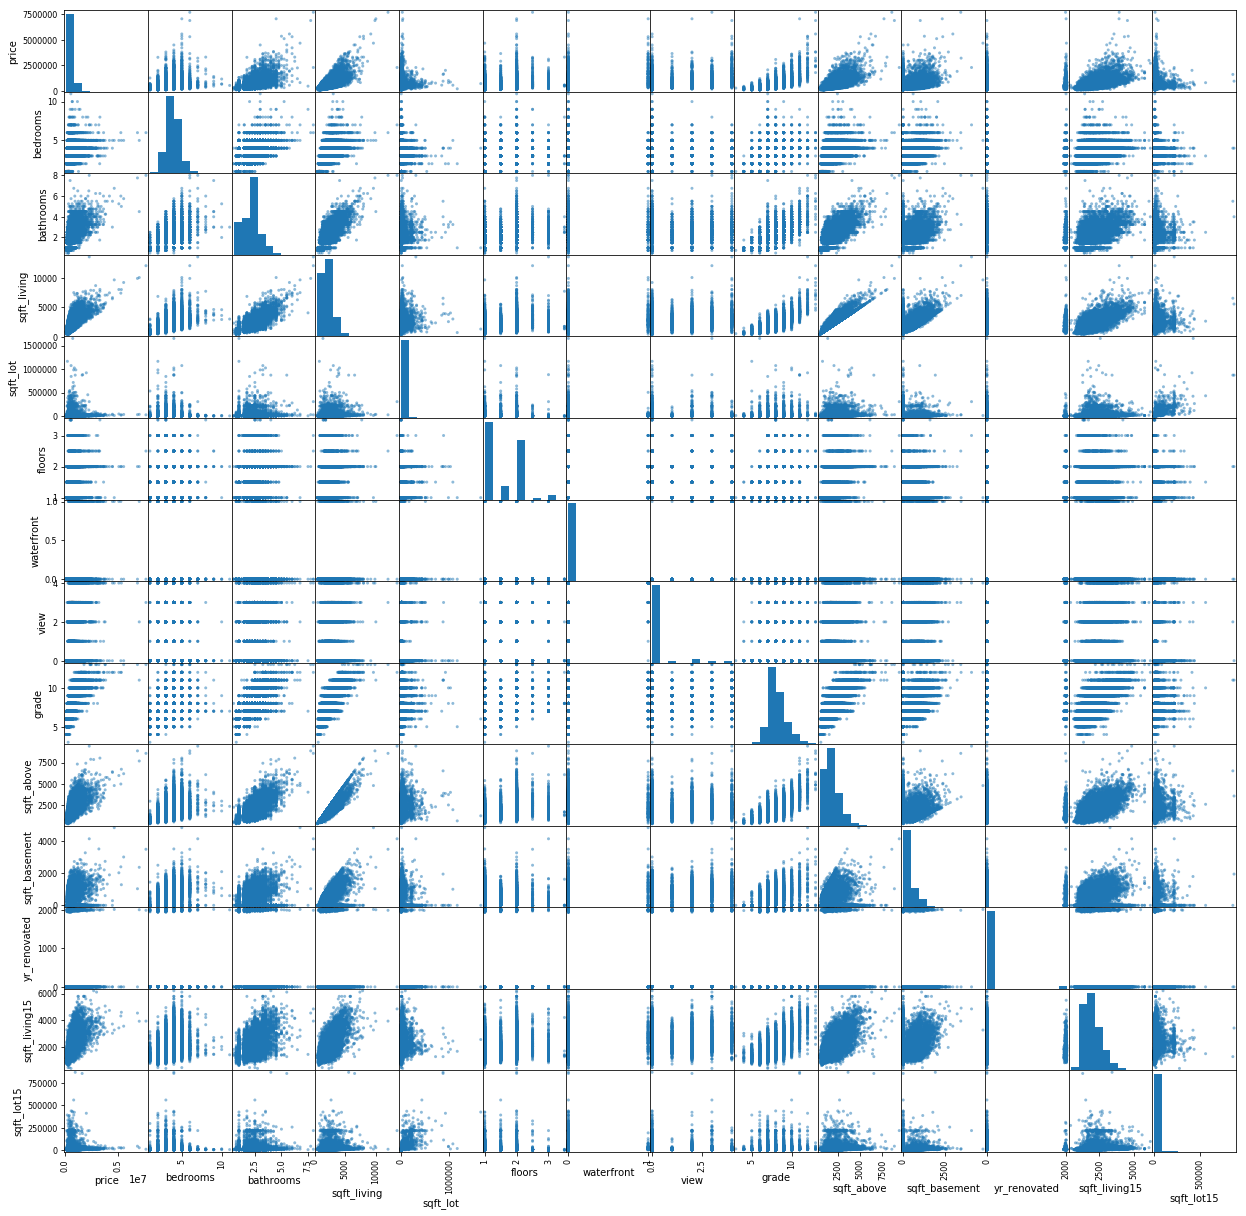

In [61]:
#MULTICOLLINEARITY ANALYSIS
pd.plotting.scatter_matrix(kc_house4, figsize=[21,21]);

In [62]:
#Correlation Matrix
kc_house4.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.667964,0.605392,0.321103,0.117858,0.585267,0.082849
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.366174,0.492543,0.303517,0.018626,0.404532,0.031892
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,0.665834,0.686664,0.278504,0.047173,0.569878,0.088297
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,0.762776,0.876448,0.428683,0.051056,0.756400,0.184337
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,0.114726,0.184134,0.015038,0.004977,0.144756,0.718203
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,0.458783,0.523970,-0.241845,0.003785,0.280072,-0.010734
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.082817,0.071776,0.083053,0.073938,0.083822,0.030657
view,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.249077,0.166007,0.270641,0.090337,0.278921,0.073079
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,0.249077,1.000000,0.756069,0.165863,0.015618,0.713863,0.120974
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,0.071776,0.166007,0.756069,1.000000,-0.051149,0.020637,0.731756,0.195069


In [63]:
#Return "True" for positive or negative correlations that are bigger than 0.75.
abs(kc_house4.corr())>.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False


In [65]:
#drop the following predictors because corr < 10% to price:  'sqft_lot','sqft_lot15', sqft_living15

#Option 1:  Remove the multicollinear predictors from the data:  KEEP sqft_living and DROP 'bathrooms', 'grade', 
#'sqft_above','sqft_living15' because they are correlated to it.

#Option 2:  Remove the multicollinear predictors from the data:  KEEP: 'bathrooms','grade'(or'sqft_above'),
#'sqft_living15'; #DROP: 'sqft_living' and 'sqft_above' (or 'grade') because they are correlated to it.


kc_house5=kc_house4.drop(['bathrooms','sqft_above','sqft_living15','sqft_lot','sqft_lot15'],axis=1)#rsquared .60
kc_house5b=kc_house4.drop(['sqft_living','sqft_above','sqft_lot','sqft_lot15'],axis=1)#rsquared is .56
kc_house5c=kc_house4.drop(['sqft_living','grade','sqft_lot','sqft_lot15'],axis=1)#rsquared is .56
kc_house5d=kc_house4.drop(['bathrooms','sqft_above','sqft_living15','grade','sqft_lot','sqft_lot15'],axis=1)#.56




In [66]:
kc_house5.columns

Index(['price', 'bedrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_basement', 'yr_renovated'],
      dtype='object')

In [67]:
X = kc_house4.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house4).fit()
model.rsquared,model.rsquared_adj

(0.604006227212822, 0.6037676988537157)

In [68]:
X = kc_house5.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house5).fit()
model.rsquared,model.rsquared_adj

(0.6006515950697064, 0.6005035991814662)

In [69]:
X = kc_house5b.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house5b).fit()
model.rsquared,model.rsquared_adj

(0.5659870999839669, 0.565806143989334)

In [70]:
X = kc_house5c.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house5c).fit()
model.rsquared,model.rsquared_adj

(0.5660362035717592, 0.5658552680502242)

In [71]:
X= kc_house5d.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house5d).fit()
model.rsquared,model.rsquared_adj

(0.563686554541767, 0.563545078067883)

In [37]:
#LOG TRANSFORMATION and SCALING: replace sqft_living with log transformed values prior to multilinear regression

#***NOTE that R-squared was not improved by transforming data.  It was the same for 'kc_house5' as 'kc_tran6'. So,
#I'm commenting out the code below and proceeding without the transformation nor scaling.

#sqbase=(kc_house5['sqft_basement'])
#log_sqliv=np.log(kc_house5['sqft_living'])
#scaled_log_sqliv=(log_sqliv-min(log_sqliv))/(max(log_sqliv)-min(log_sqliv))
#scaled_sqbase=(sqbase-min(sqbase))/(max(sqbase)-min(sqbase))

#trans_df=kc_house5

#kc_trans6=trans_df
#kc_trans6['sqft_basement']=scaled_sqbase
#kc_trans6['sqft_living']=scaled_log_sqliv
#kc_trans6.head()

In [ ]:
#Next, we'll evaluate the model using STEPWIDE SELECTION with p-values

#In stepwise selection, we start with an empty model (which only includes the intercept), and each time, the 
#variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). 
#After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter 
#estimates which were added to the model previously, and remove them if the p-value exceeds a certain value 
#(backward step). The algorithm stops when no variables can be added or removed given the threshold values.

In [72]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [73]:
X = kc_house5.drop(['price'],axis=1)
y=pd.DataFrame(kc_house5['price'])
stepwise_selection(X, y, 
                   initial_list=[], 
                   threshold_in=0.01, 
                   threshold_out = 0.05, 
                   verbose=True)

Add  view                           with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  grade                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  waterfront                     with p-value 4.20896e-181
Add  yr_renovated                   with p-value 1.28635e-55
Add  sqft_basement                  with p-value 3.12039e-31
Add  floors                         with p-value 2.66192e-07


['view',
 'bedrooms',
 'grade',
 'sqft_living',
 'waterfront',
 'yr_renovated',
 'sqft_basement',
 'floors']

In [74]:
kc_house5.columns

Index(['price', 'bedrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_basement', 'yr_renovated'],
      dtype='object')

In [42]:
#STEPWISE SELECTION drops from kc_house5:  NONE

In [82]:
#Use Feature ranking with RECURSIVE FEATURE ELIMINATION (RFE) to analyze predictors
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
predictors=kc_house5.drop(['price'],axis=1)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 8)
selector = selector.fit(predictors, kc_house5["price"])
selector.support_


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#RFE selection for kc_house5: 'waterfront','grade','view','bedrooms','floors','sqft_living','yr_renovated',
#    'sqft_basement';  DROP: NONE

#When subtracted from the model, they do not decrease the Rsquared nor Adj Rsquared.


In [89]:
kc_house6=kc_house5.drop(['sqft_basement'],axis=1)

In [90]:
X = kc_house6.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house6).fit()
model.rsquared,model.rsquared_adj

(0.5992988084379921, 0.5991688793875505)

In [91]:
rsquared_=[]
rsquared_adj_=[]
mse_=[]
for i in [kc_house4,kc_house5,kc_house6]:
    X = i.drop('price', axis=1)
    pred_sum = "+".join(X.columns)
    formula = 'price~' + pred_sum
    model = ols(formula= formula, data=i).fit()
    rsquared_.append(model.rsquared)
    rsquared_adj_.append(model.rsquared_adj)
    mse_.append(model.mse_resid)
rsquared_,rsquared_adj_,mse_

([0.604006227212822, 0.6006515950697064, 0.5992988084379921],
 [0.6037676988537157, 0.6005035991814662, 0.5991688793875505],
 [53477547829.295296, 53918087497.15509, 54098228140.4377])

In [92]:
#CROSS-VALIDATION using Scikit-Learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = kc_house5.drop(['price'],axis=1)
y=pd.DataFrame(kc_house5['price'])
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
cv_10_results,round(np.mean(cv_10_results),1)

(array([-5.72204882e+10, -6.17106852e+10, -5.06724319e+10, -6.42194888e+10,
        -4.85365349e+10, -4.98856867e+10, -4.92858402e+10, -5.27465217e+10,
        -5.48420350e+10, -5.23534892e+10]), -54147320170.9)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
yhat_train=linreg.predict(X_train)
yhat_test=linreg.predict(X_test)
train_residuals=y_train-yhat_train
test_residuals=y_test-yhat_test
mse_train=np.sum(train_residuals**2)/len(y_train)
mse_test=np.sum(test_residuals**2)/len(y_test)
mse_train,mse_test

(price    5.373650e+10
 dtype: float64, price    5.556514e+10
 dtype: float64)

In [95]:
X = kc_house5.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     4059.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:53:08   Log-Likelihood:            -2.9747e+05
No. Observations:               21596   AIC:                         5.949e+05
Df Residuals:                   21587   BIC:                         5.950e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.911e+05   1.44e+04    -34.131      0.000   -5.19e+05   -4.63e+05
bedrooms      -3.469e+04   2218.824    -15.634      0.000    -3.9e+04   -3.03e+04
sqft_living     177.2561      3.492     50.766      0.000     170.412     184.100
floors        -1.867e+04   3626.167     -5.148      0.000   -2.58e+04   -1.16e+04
waterfront     6.045e+05   2.09e+04     28.918      0.000    5.64e+05    6.45e+05
view           6.045e+04   2377.312     25.429      0.000    5.58e+04    6.51e+04
grade           1.01e+05   2259.072     44.701      0.000    9.66e+04    1.05e+05
sqft_basement    39.5517      4.625      8.551      0.000      30.486      48.617
yr_renovated     68.1000      4.370     15.585      0.000      59.535      76.665
==============================================================================
Omnibus:                    15307.007   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           835567.295
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      32.943   Cond. No.                     3.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#Dropping 'bedrooms','floors' because of their high negative coefficient.
kc_house7=kc_house5.drop(['bedrooms','floors'],axis=1)
kc_house7.head()

,price,sqft_living,waterfront,view,grade,sqft_basement,yr_renovated
0,221900.0,1180,0.0,0.0,7,0.0,0.0
1,538000.0,2570,0.0,0.0,7,400.0,1991.0
2,180000.0,770,0.0,0.0,6,0.0,0.0
3,604000.0,1960,0.0,0.0,7,910.0,0.0
4,510000.0,1680,0.0,0.0,8,0.0,0.0


In [98]:
X = kc_house7.drop('price', axis=1)
pred_sum = "+".join(X.columns)
formula = 'price~' + pred_sum
model = ols(formula= formula, data=kc_house7).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     5298.
Date:                Sat, 19 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:55:52   Log-Likelihood:            -2.9760e+05
No. Observations:               21596   AIC:                         5.952e+05
Df Residuals:                   21589   BIC:                         5.953e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.974e+05   1.29e+04    -46.345      0.000   -6.23e+05   -5.72e+05
sqft_living     148.3914      3.046     48.720      0.000     142.421     154.361
waterfront      6.18e+05    2.1e+04     29.408      0.000    5.77e+05    6.59e+05
view           6.398e+04   2382.734     26.852      0.000    5.93e+04    6.87e+04
grade          1.034e+05   2195.143     47.109      0.000    9.91e+04    1.08e+05
sqft_basement    46.3098      4.249     10.900      0.000      37.982      54.637
yr_renovated     68.5602      4.396     15.595      0.000      59.943      77.177
==============================================================================
Omnibus:                    15810.966   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           947038.759
Skew:                           2.946   Prob(JB):                         0.00
Kurtosis:                      34.902   Cond. No.                     3.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Price=(-597,400) + (148)*sqft_living + (618,000)*waterfront + (63,980)*view + (103,400)*grade + 
#       (46.3)*sqft_basement + (68.6)*yr_renovated

In [101]:
pd.DataFrame(y_train).head()

,price
10805,1690000.0
20472,1290000.0
13650,360000.0
6884,235000.0
12874,340000.0


In [102]:
pd.DataFrame(train_residuals).head()

,price
10805,162328.627157
20472,213391.025518
13650,-133608.687629
6884,-125202.858702
12874,-231431.300243


In [209]:
len(y_train),len(train_residuals),len(yhat_train)

(19432, 19432, 19432)

In [103]:
df_y_train=pd.DataFrame(y_train)
df_train_residuals=round(pd.DataFrame(train_residuals))#y_train-yhat_train, so + residuals indicates predicted
#sale price is < observed
percent_below_obs=.3
threshold_value=percent_below_obs*df_y_train
test=df_train_residuals>threshold_value
result=pd.concat([df_y_train,df_train_residuals,test],axis=1,
                 join_axes=[df_y_train.index],ignore_index=True)
result=result.rename({0:'Sale_Price',1:'residuals',2:'Bad_Invest_Test'},axis='columns')
result.head()

,Sale_Price,residuals,Bad_Invest_Test
10805,1690000.0,162329.0,False
20472,1290000.0,213391.0,False
13650,360000.0,-133609.0,False
6884,235000.0,-125203.0,False
12874,340000.0,-231431.0,False


In [283]:
print(f'Investing in a House is consider BAD if the Predicted Sale Price is > {100-round(percent_below_obs*100)}% of the Observed Sale Price') 
print(f'Number of BAD Investments is {sum(result.Bad_Invest_Test)} of {len(y_train)}') 
print('Our assumptions create a GOOD Investment if our GOOD Investment % is > 95%') 
print(f'Based on our assumptions, our model predicts that {round(100-(sum(result.Bad_Invest_Test)/len(y_train))*100)} % will be GOOD')



Investing in a House is consider BAD if the Predicted Sale Price is > 70% of the Observed Sale Price
Number of BAD Investments is 2836 of 19432
Our assumptions create a GOOD Investment if our GOOD Investment % is > 95%
Based on our assumptions, our model predicts that 85 % will be GOOD


In [105]:
print(f'Investing in a House is consider BAD if the Predicted Sale Price is > {100-round(percent_below_obs*100)}% of the Observed Sale Price') 
print(f'Number of BAD Investments is {sum(result.Bad_Invest_Test)} of {len(y_train)}') 
print('Our assumptions create a GOOD Investment if our GOOD Investment % is > 95%') 
print(f'Based on our assumptions, our model predicts that {round(100-(sum(result.Bad_Invest_Test)/len(y_train))*100)} % will be GOOD')



Investing in a House is consider BAD if the Predicted Sale Price is > 70% of the Observed Sale Price
Number of BAD Investments is 2822 of 19436
Our assumptions create a GOOD Investment if our GOOD Investment % is > 95%
Based on our assumptions, our model predicts that 85 % will be GOOD


In [104]:
kc_house7.head()

,price,sqft_living,waterfront,view,grade,sqft_basement,yr_renovated
0,221900.0,1180,0.0,0.0,7,0.0,0.0
1,538000.0,2570,0.0,0.0,7,400.0,1991.0
2,180000.0,770,0.0,0.0,6,0.0,0.0
3,604000.0,1960,0.0,0.0,7,910.0,0.0
4,510000.0,1680,0.0,0.0,8,0.0,0.0
